In [71]:
import sys 
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
import statistics
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [72]:
green_nyc_only = pd.read_csv('green_nyc_only.csv', delimiter = ',', header = 0, low_memory=False)

In [73]:
green_nyc_only_complete = green_nyc_only[(green_nyc_only['Project Status'] == 'Complete' )]

In [74]:
green_nyc_only.describe()

,Unnamed: 0,ZipCode,Days_to_complete,Less_than_180_days,total_inverter_quantity,total_pv_module_quantity,ProjectCost,Incentive,After incentive,Total Nameplate kW DC,expected_kwh_annual_output,Expected monthly kWh production
count,26669.000000,26669.000000,26669.000000,26669.000000,26646.000000,26640.000000,2.664800e+04,2.661700e+04,2.666900e+04,26669.000000,2.666800e+04,26669.000000
mean,56480.682965,10933.941993,-3876.272114,0.741985,9.705922,35.036824,4.707843e+04,7.761800e+03,3.929472e+04,12.520801,1.435098e+04,1195.912295
std,33688.817801,503.026261,12707.969008,0.437550,15.145828,212.539922,1.683311e+05,5.238912e+04,1.209490e+05,84.952366,1.008272e+05,8402.115609
min,1.000000,10001.000000,-44071.000000,0.000000,0.000000,0.000000,9.500000e+02,8.000000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,15531.000000,10312.000000,43.000000,0.000000,1.000000,13.000000,1.822800e+04,1.340000e+03,1.638500e+04,4.200000,4.699000e+03,392.000000
50%,72118.000000,11215.000000,91.000000,1.000000,2.000000,18.000000,2.579244e+04,2.070000e+03,2.320600e+04,5.700000,6.325000e+03,527.000000
75%,89769.000000,11412.000000,185.000000,1.000000,16.000000,25.000000,3.681600e+04,3.780000e+03,3.310900e+04,7.880000,8.726000e+03,727.000000
max,109921.000000,11694.000000,2547.000000,1.000000,986.000000,17952.000000,1.155124e+07,4.254624e+06,7.296621e+06,7001.280000,7.913076e+06,659423.000000


In [75]:
num_df = green_nyc_only[['ProjectCost', 'Days_to_complete', 'Less_than_180_days', 'Incentive']]

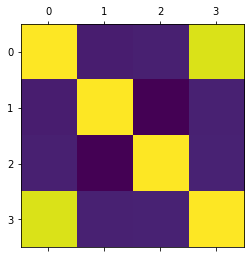

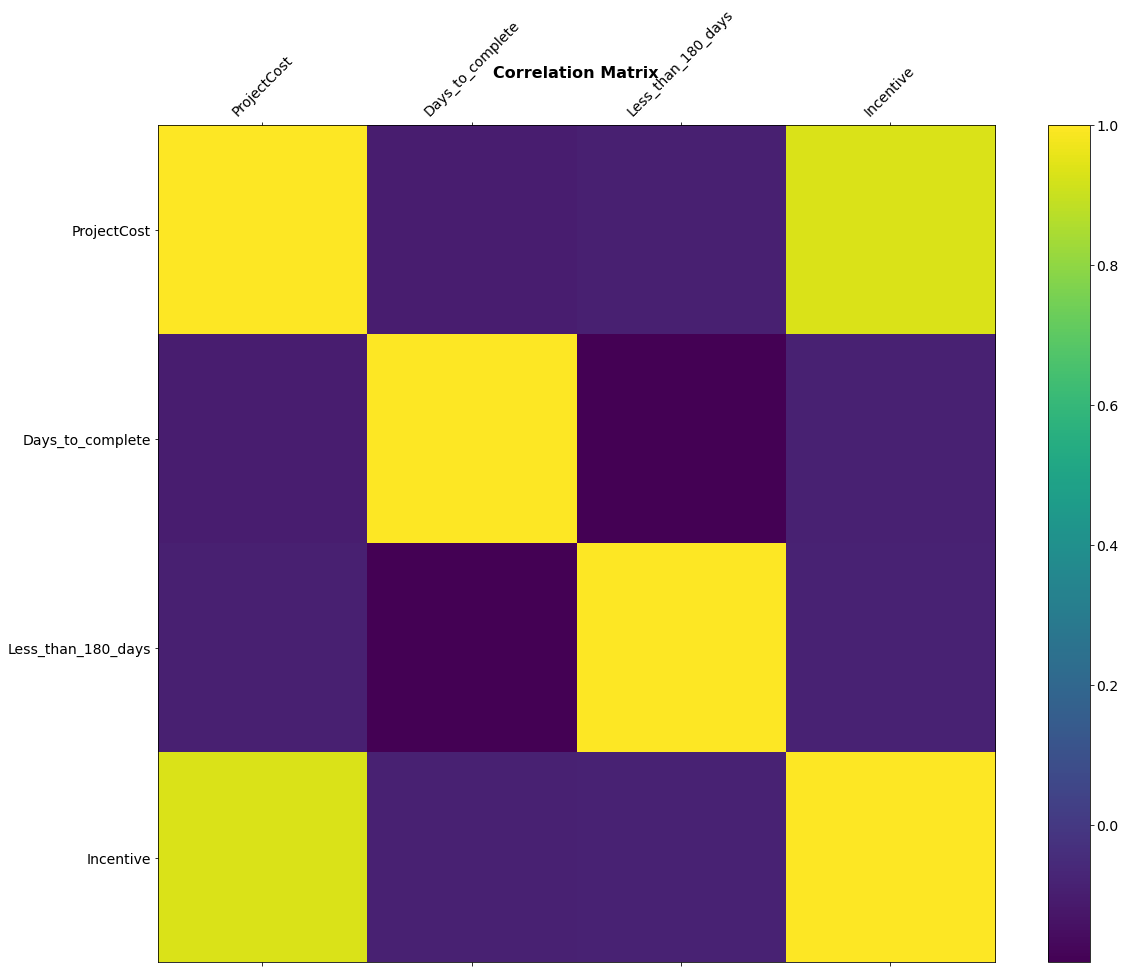

In [76]:
#Correlation Matrix
plt.matshow(num_df.corr())

f = plt.figure(figsize=(19, 15))
plt.matshow(num_df.corr(), fignum=f.number)
plt.xticks(range(num_df.shape[1]), num_df.columns, fontsize=14, rotation=45)
plt.yticks(range(num_df.shape[1]), num_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')

plt.show()

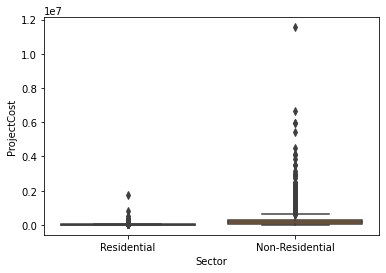

In [77]:
sns.boxplot('Sector', 'ProjectCost', data=green_nyc_only)

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(green_nyc_only['ProjectCost'])
le

array([ 9653,  7962,  6127, ..., 14444, 11022, 15126], dtype=int64)

In [79]:
green_nyc_only.loc[:, "ProjectCost"] = le
green_nyc_only.head()

,Unnamed: 0,ProjectNumber,City,County,ZipCode,Sector,ProgramType,Solicitation,Electric Utility,PurchaseType,...,ProjectCost,Incentive,After incentive,PercentIncentive,Total Nameplate kW DC,expected_kwh_annual_output,Expected monthly kWh production,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant
0,1,221994,107-02 Sutter ave,Queens,11417,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,...,9653,1760.0,23811,7,5.87,6108.0,509,No,No,No
1,2,221967,93-06 208TH ST,Queens,11428,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,...,7962,1552.0,21218,7,5.18,5358.0,447,No,No,No
2,239,154309,ALBANS,Queens,11412,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,...,6127,924.0,18974,5,3.90,4148.0,346,No,No,No
3,240,165528,Albans,New York,11413,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,...,17400,1775.0,50034,3,8.70,7989.0,666,No,No,No
4,2789,219528,Ardsley,Westchester,10025,Non-Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Purchase,...,19983,652344.0,1638471,28,948.64,1116338.0,93028,No,No,No


In [80]:
green_nyc_only.columns

Index(['Unnamed: 0', 'ProjectNumber', 'City', 'County', 'ZipCode', 'Sector',
       'ProgramType', 'Solicitation', 'Electric Utility', 'PurchaseType',
       'date_application_received', 'Date Completed', 'Days_to_complete',
       'Less_than_180_days', 'Project Status', 'Contractor',
       'primary_inverter_manufacturer', 'Primary Inverter Model Number',
       'total_inverter_quantity', 'primary_pv_module_manufacturer',
       'PV Module Model Number', 'total_pv_module_quantity', 'ProjectCost',
       'Incentive', 'After incentive', 'PercentIncentive',
       'Total Nameplate kW DC', 'expected_kwh_annual_output',
       'Expected monthly kWh production', 'Affordable Solar',
       'Community Distributed Generation',
       'Green Jobs Green New York Participant'],
      dtype='object')

In [81]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):
    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [82]:
train, test = statsmodels_train_test_split(green_nyc_only)

In [87]:
formula = 'ProjectCost ~ C(Sector)+ total_inverter_quantity + total_pv_module_quantity + expected_kwh_annual_output + Incentive + Contractor + primary_inverter_manufacturer + primary_pv_module_manufacturer + date_application_received'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ProjectCost   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     11.56
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:11:07   Log-Likelihood:            -1.7406e+05
No. Observations:               18229   AIC:                         3.527e+05
Df Residuals:                   15940   BIC:                         3.706e+05
Df Model:                        2288                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            1.466e+04   5889.309      2.489      0.013    3117.115    2.62e+04
C(Sector)[T.Residential]                                                            -3836.4583    255.941    -14.990      0.000   -4338.132   -3334.785
Contractor[T.174 Power Global NorthEast, LLC]                                        1593.2882   7132.337      0.223      0.823   -1.24e+04    1.56e+04
Contractor[T.1st Light Energy]                                                       4174.9312   5076.987      0.822      0.411   -5776.535    1.41e+04
Contractor[T.A-Best Energy Power]                                                    4079.6700   5150.754      0.792      0.428   -6016.390    1.42e+04
Contractor[T.ABEST ENERGY POWER]                                                     2341.8788   4321.684      0.542      0.588   -6129.109    1.08e+04
Contractor[T.AE Solar Energy Inc.]                                                   1.318e+04   1719.222      7.667      0.000    9811.803    1.66e+04
Contractor[T.Absolutely Energized Solar Electric Inc]                                8406.8837   1798.953      4.673      0.000    4880.733    1.19e+04
Contractor[T.Accord Power, Inc.]                                                     3087.9828   5095.718      0.606      0.545   -6900.200    1.31e+04
Contractor[T.Ace Solar LLC (dba for Alliance Cooperative Energy)]                    5099.6865   6310.747      0.808      0.419   -7270.090    1.75e+04
Contractor[T.AeonSolar]                                                              3158.6816   5152.252      0.613      0.540   -6940.313    1.33e+04
Contractor[T.All Air Specialists, Inc.]                                              4667.1558   3505.865      1.331      0.183   -2204.735    1.15e+04
Contractor[T.Alteris Renewables Inc.]                                                1.292e+04   2769.671      4.664      0.000    7487.718    1.83e+04
Contractor[T.Alternative Power and Light]                                            6425.4425   6839.263      0.939      0.347   -6980.285    1.98e+04
Contractor[T.Amergy Solar Inc.]                                                      3579.8752   5085.757      0.704      0.482   -6388.783    1.35e+04
Contractor[T.American Renewable Energy, Inc. (Amergy)]                                276.8271   5816.992      0.048      0.962   -1.11e+04    1.17e+04
Contractor[T.American Solar Partners]                                                4095.6263   5093.254      0.804      0.421   -5887.727    1.41e+04
Contractor[T.Analemma Solar Corp.]         